# Outlier Analysis 

Through this analysis, we are interested in answering the following questions: 
How can we use outlier analysis in order to enhance the predictive power of our model ? 

How are outliers dispersed along to different variables in our dataset ( region,organization,income sources etc..) ? 

What income sequence contributes to the presence of outliers overall and throughout the years? 

How outliers can vary accross years ?  

Is having outliers, high levels of income, a catalyst for sustainable growth in the private sector income? Or is it an indicator of the opposite ? 


## Outliers' Analysis through the different variables in the dataset. 

In [2]:
#packages installation 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
import pickle
from wordcloud import WordCloud
import numpy as np 
import math
from scipy import stats

In [3]:
#open the pickle file of the dataset 
#open the pickle file containing the dataset 
with open("private_public_income.pkl", "rb") as pklfile:
    private_public_income = pickle.load(pklfile)

In [12]:
%store -r private_income

In [13]:
private_income.columns

Index(['ETLControlID', 'OrgCode', 'RowIndex', 'CountryStandardised',
       'CountrySubmitted', 'RegionSubmitted', 'LineDescription',
       'IncomeAllocation', 'RestrictedIncome', 'EmergencyIncome', 'Source',
       'Category', 'Type', 'Item', 'CurrencyCode', 'Notes',
       'IncomeSubmitted2010', 'IncomeSubmitted2011', 'IncomeSubmitted2012',
       'IncomeSubmitted2013', 'IncomeSubmitted2014', 'IncomeSubmitted2015',
       'IncomeSubmitted2016', 'IncomeSubmitted2017', 'IncomeSubmitted2018',
       'IncomeSubmitted2019', 'IncomeSubmitted2020', 'IncomeSubmitted2021',
       'IncomeSubmitted2022', 'ProvisionalFigureCY', 'CurrencyName',
       'ExcludeRow', 'IncomeUSD2010', 'IncomeUSD2011', 'IncomeUSD2012',
       'IncomeUSD2013', 'IncomeUSD2014', 'IncomeUSD2015', 'IncomeUSD2016',
       'IncomeUSD2017', 'IncomeUSD2018', 'IncomeUSD2019', 'IncomeUSD2020',
       'IncomeUSD2021', 'IncomeUSD2022', 'IncomeEUR2010', 'IncomeEUR2011',
       'IncomeEUR2012', 'IncomeEUR2013', 'IncomeEUR2014', 'I

In [15]:
# Assuming 'private_public_income' is your DataFrame
private_income['income_sum_log_USD'] = np.log10(private_income['income_sum_USD'])

In [4]:
#ignore warnings 
import warnings
warnings.filterwarnings('ignore') 

In [5]:
# we want to create a function with which we can detect outliers
def outlier_detect(dataframe,column): 
    #finding the IQR 
    percentile25 = dataframe[column].quantile(0.25)
    percentile75 = dataframe[column].quantile(0.75)
    iqr = percentile75 - percentile25
    #setting the upper limit and the lower limit 
    upper_limit = percentile75 + 1.5 * iqr 
    lower_limit = percentile25 - 1.5 * iqr 
    #finding outliers and return output 
    return lower_limit,upper_limit

In [6]:
def catplot_graphing(dataset,x,y,estimator = 'mean',hue = None,figure_size = (8, 6),kind = 'bar') : 
    #set the order in the dataset  
    result = dataset.groupby(x)[y].sum().reset_index().sort_values(by = y,ascending = False).head(17)
    # Set the default figure size
    #plot the graph in a bar plot  
    #we want to add to if the plot is a box plot, color outliers
    if (kind == 'box') : 
        # Set the color for the outliers
        flierprops = dict(marker='o', markerfacecolor='red', markersize=8, linestyle='none')
        g = sns.catplot(data = dataset,x = x, y = y,order = result[x],hue = hue,kind = kind,estimator = estimator,height=figure_size[0], aspect=figure_size[1],flierprops = flierprops)
    else: 
        g = sns.catplot(data = dataset,x = x, y = y,order = result[x],hue = hue,kind = kind,estimator = estimator,height=figure_size[0], aspect=figure_size[1]) 
    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    
   #show plot 
    plt.show() 
    return g

In [37]:
from matplotlib.colors import LinearSegmentedColormap

In [39]:
UNHCR_palette = ["#151819","#565656","#cdcdcd","#dad9d9","#20345b","#536280","#006ab4","#0090bc","#3b8cc5","#699cd4","#8bb2dd","#dfe6f6","#fcc00d","#e4cc00",'#ffed00',"#c01718","#e73d59","#ec697f"]
custom_palette = LinearSegmentedColormap.from_list('custom_palette', UNHCR_palette)

### General

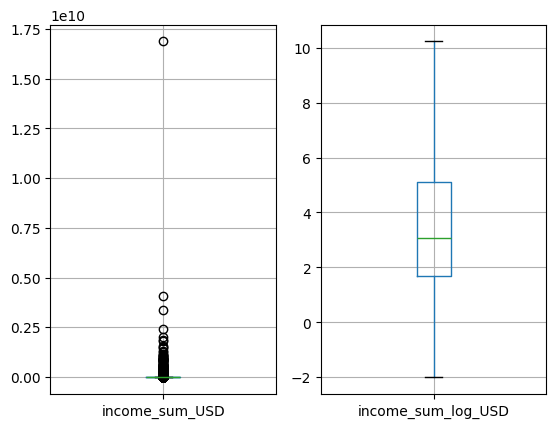

In [16]:
plt.subplot(1,2,1)
private_income.boxplot(column = 'income_sum_USD') 
plt.subplot(1,2,2)
private_income.boxplot(column = 'income_sum_log_USD') 
plt.show()

In [8]:
#display all the rows that contain outlier variables 
pd.concat([dataframe[dataframe[column] > upper_limit], dataframe[dataframe[column] < lower_limit]])

NameError: name 'dataframe' is not defined

In [21]:
lower_limit,upper_limit = outlier_detect(private_income,'income_sum_USD')

In [18]:
#calculate the skewness of income in general   
#the skewness of income without log transform 
general_skewness = private_income['income_sum_USD'].skew()
#the skewness of income with log transform  
general_log_skewness = np.log10(private_income['income_sum_USD'].skew())
#print both values 
print(f'The general skewness : {general_skewness}') 
print(f'The general log skewness : {general_log_skewness}')

The general skewness : 109.03512100565317
The general log skewness : 2.0375664098870625


### Outliers by Organization - Using the Original Income

In [22]:
income_low_outliers = private_income[private_income['income_sum_USD'] < lower_limit]
income_high_outliers = private_income[private_income['income_sum_USD'] > upper_limit]
income_outliers = pd.concat([income_low_outliers, income_high_outliers])                                             

In [23]:
# what is the prcentage of outlier variables in the dataset 
total_number_outlier = len(income_outliers)
total_income_low_outliers = len(income_low_outliers) 
total_income_high_outliers = len(income_high_outliers)
print(f'The total number of outliers is {total_number_outlier}, it corresponds to {total_number_outlier / len(private_income):.2%} of the total dataset')
print(f'The total number of upper outliers is {total_income_high_outliers}, it corresponds to {total_income_high_outliers / total_number_outlier:.2%} of the total number of outliers')
print(f'The total number of lower outliers is {total_income_low_outliers}, it corresponds to {total_income_low_outliers / total_number_outlier:.2%} of the total number of outliers')

The total number of outliers is 5290, it corresponds to 20.34% of the total dataset
The total number of upper outliers is 5270, it corresponds to 99.62% of the total number of outliers
The total number of lower outliers is 20, it corresponds to 0.38% of the total number of outliers


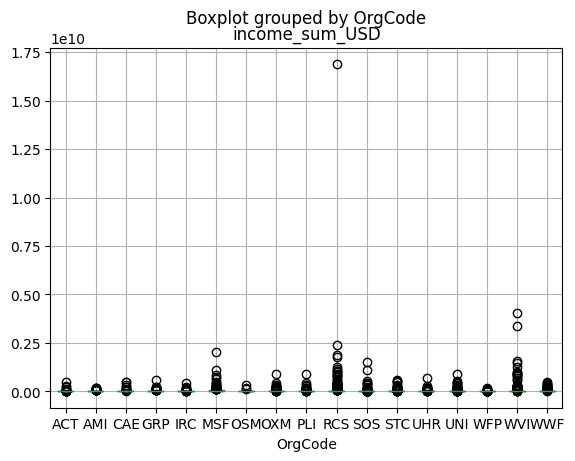

In [25]:
# we will perform our future analysis on this dataframe : income_high_outliers 
income_high_outliers.boxplot(column = 'income_sum_USD',by = 'OrgCode') 
plt.show()

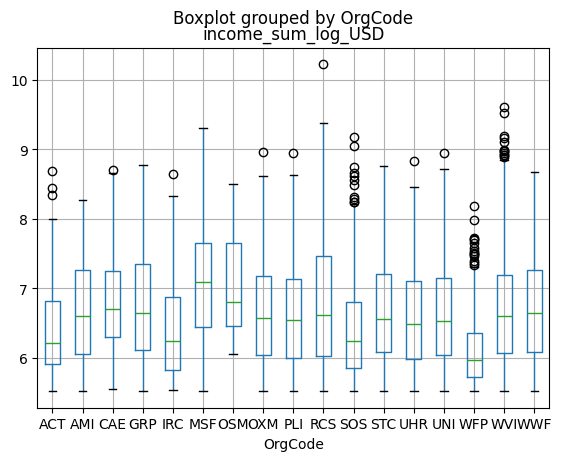

In [26]:
income_high_outliers.boxplot(column = 'income_sum_log_USD',by = 'OrgCode') 
plt.show()

### General Income Distribution 

TypeError: Axes.boxplot() got an unexpected keyword argument 'colormap'

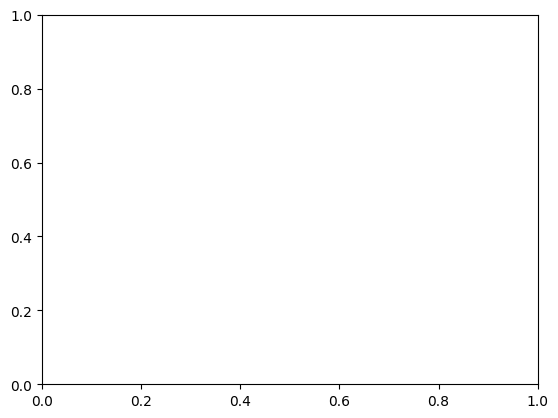

In [45]:
grouped = private_income.groupby('OrgCode')
df2 = pd.DataFrame({col:vals['income_sum_log_USD'] for col,vals in grouped}) 
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]
df2.boxplot(colormap=custom_palette)
plt.xticks(rotation = 90)
plt.show()

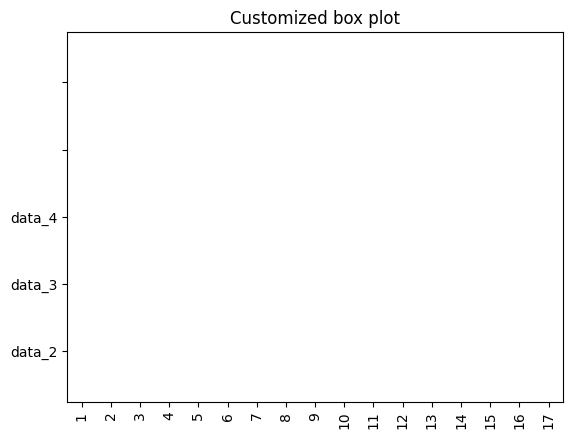

In [50]:
# Assuming 'private_income' is your DataFrame
grouped = private_income.groupby('OrgCode')
df2 = pd.DataFrame({col:vals['income_sum_log_USD'] for col,vals in grouped}) 
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]

# Boxplot with custom colors
fig, ax = plt.subplots()
box = ax.boxplot(df2, patch_artist=True, notch=True)

for patch, color in zip(box['boxes'], UNHCR_palette):
    patch.set_facecolor(color)
     
# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

plt.show()

### Income Distribution of Outliers 

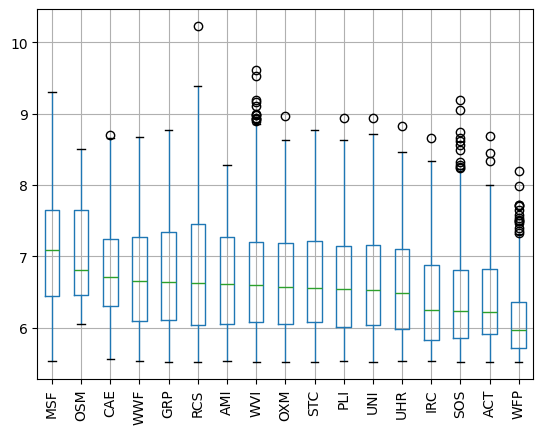

In [34]:
#we want to reproduce the above chart but after ordering the mean 
grouped = income_high_outliers.groupby('OrgCode')
df2 = pd.DataFrame({col:vals['income_sum_log_USD'] for col,vals in grouped}) 
meds = df2.median()
meds.sort_values(ascending=False, inplace=True)
df2 = df2[meds.index]
df2.boxplot()
plt.xticks(rotation = 90)
plt.show()

### Income Distribution Without Outliers

In [31]:
#create a datafrsme where high outliers are excluded from the dataset 
income_without_outliers = pd.merge(private_income, income_high_outliers, how='outer', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)

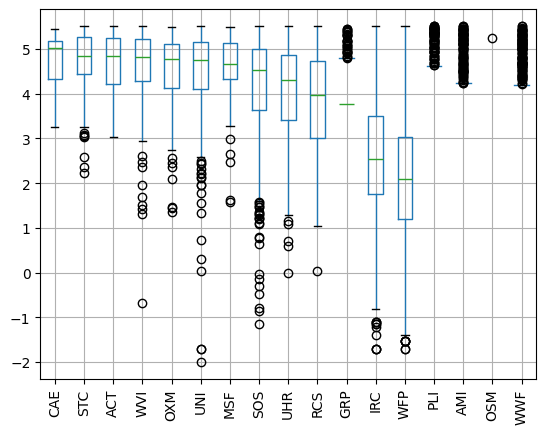

In [35]:
#plot the boxplot of the resulting data 
grouped_1 = income_without_outliers.groupby('OrgCode')
df_income_high_outliers = pd.DataFrame({col:vals['income_sum_log_USD'] for col,vals in grouped_1}) 
medians = df_income_high_outliers.median()
medians.sort_values(ascending=False, inplace=True)
df_income_high_outliers = df_income_high_outliers[medians.index]
df_income_high_outliers.boxplot()
plt.xticks(rotation = 90)
plt.show()

In [ ]:
private_public_income.boxplot(column = 'income_sum_log_USD', by = 'OrgCode') 
plt.show()

### Outliers by Organization - Using Transformed Income

In [ ]:
lower_log,upper_log = outlier_detect(private_public_income,'income_sum_log_USD') 

In [ ]:
income_log_low_outliers = private_public_income[private_public_income['income_sum_log_USD'] < lower_log]
income_log_high_outliers = private_public_income[private_public_income['income_sum_log_USD'] > upper_log]
income_log_outliers = pd.concat([income_log_low_outliers, income_log_high_outliers])            

In [ ]:
# what is the prcentage of outlier variables in the dataset 
total_number_outlier_1 = len(income_log_outliers)
total_income_low_outliers_1 = len(income_log_low_outliers) 
total_income_high_outliers_1 = len(income_log_high_outliers)
print(f'The total number of outliers is {total_number_outlier_1}, it corresponds to {total_number_outlier_1 / len(private_public_income):.2%} of the total dataset')
print(f'The total number of upper outliers is {total_income_high_outliers_1 }, it corresponds to {total_income_high_outliers_1  / total_number_outlier_1:.2%} of the total number of outliers')
print(f'The total number of lower outliers is {total_income_low_outliers_1  }, it corresponds to {total_income_low_outliers_1  / total_number_outlier_1:.2%} of the total number of outliers')

### Outlier by Group 

In [ ]:
# divide the original dataset bu group 
private_income = private_public_income[private_public_income['Group'] == 'Private Sector']
public_income = private_public_income[private_public_income['Group'] == 'Public Funds']

In [ ]:
plt.subplot(1,2,1)
private_income.boxplot(column = 'income_sum_log_USD') 
plt.title('Private Sector')
plt.subplot(1,2,2) 
public_income.boxplot(column = 'income_sum_log_USD') 
plt.title('Public Funds')
plt.show()

In [ ]:
#in the case of the absence of log tramsform, how many outliers do we have 
plt.subplot(1,2,1)
private_income.boxplot(column = 'income_sum_USD') 
plt.title('Private Sector')
plt.subplot(1,2,2) 
public_income.boxplot(column = 'income_sum_USD') 
plt.title('Public Funds')
plt.show()

In [ ]:
lower_private,higher_private = outlier_detect(private_income ,'income_sum_USD') 

In [ ]:
lower_private

In [ ]:
higher_private

In [ ]:
#we want to know the number of outliers in the private setor income 
private_high_outliers = private_public_income[private_public_income['income_sum_USD'] > higher_private]
private_low_outliers = private_public_income[private_public_income['income_sum_USD'] < lower_private]
private_outliers = pd.concat([private_high_outliers, private_low_outliers])            

In [ ]:
len(private_outliers)

In [ ]:
private_income['income_sum_USD'].std()

In [ ]:
private_outliers['income_sum_USD'].std()

In [ ]:
total_private_low_outliers = len(private_low_outliers) 
total_private_high_outliers = len(private_high_outliers)
print(f'The total number of outliers is {len(private_outliers)}, it corresponds to {len(private_outliers) / len(private_income):.2%} of the total dataset')
print(f'The total number of upper outliers is {total_private_high_outliers }, it corresponds to {total_private_high_outliers  / len(private_outliers):.2%} of the total number of outliers')
print(f'The total number of lower outliers is {total_private_low_outliers  }, it corresponds to {total_private_low_outliers/ len(private_outliers):.2%} of the total number of outliers')

In [ ]:
lower_log_private,higher_log_private = outlier_detect(private_income ,'income_sum_log_USD')

In [ ]:
private_log_high_outliers = private_public_income[private_public_income['income_sum_log_USD'] > higher_log_private]
print(len(private_log_high_outliers))

In [ ]:
%store

In [1]:
#open the private income data 
%store -r private_income_new

In [2]:
%store -r private_donors_income_reshape

In [3]:
private_donors_income_reshape.shape

(501904, 30)

In [6]:
lower_level,upper_level = outlier_detect(private_donors_income_reshape,'Income')

In [7]:
private_donors_income_no_outliers = private_donors_income_reshape[(private_donors_income_reshape['Income'] >= lower_level) & (private_donors_income_reshape['Income'] <= upper_level)]

In [10]:
private_donors_income_reshape['Income'].isna().sum()

0

In [9]:
private_donors_income_no_outliers['Income'].isna().sum()

0

In [ ]:
filtered_df.shape

In [ ]:
# we want a dataset that excludes the outliers 
lower_log,upper_log = outlier_detect(private_public_income,'income_sum_log_USD') 

In [ ]:
#save the dataset with no outliers  
%store private_donors_income_no_outliers